# Detección de rostros 

Mediapipe incluye la funcionalidad de detección de rostros a través de una red neuronal optimizada para disposivos móviles, lo que garantiza tiempos de inferencia bajos. El modelo en cuestión es BlazeFace, basado en un backbone de extracción de características MobileNet y un detector SSD.

El detector de rostros de MediaPipe ofrece además puntos clave o keypoints del rostro como ser boca, nariz, ojos y orejas.

In [1]:
import cv2  # opencv
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]    # incrementar tamaño de plots

face_detector = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [2]:
def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

<class 'numpy.ndarray'> uint8 [173 185 145]
<class 'numpy.ndarray'> uint8 [173 185 145]


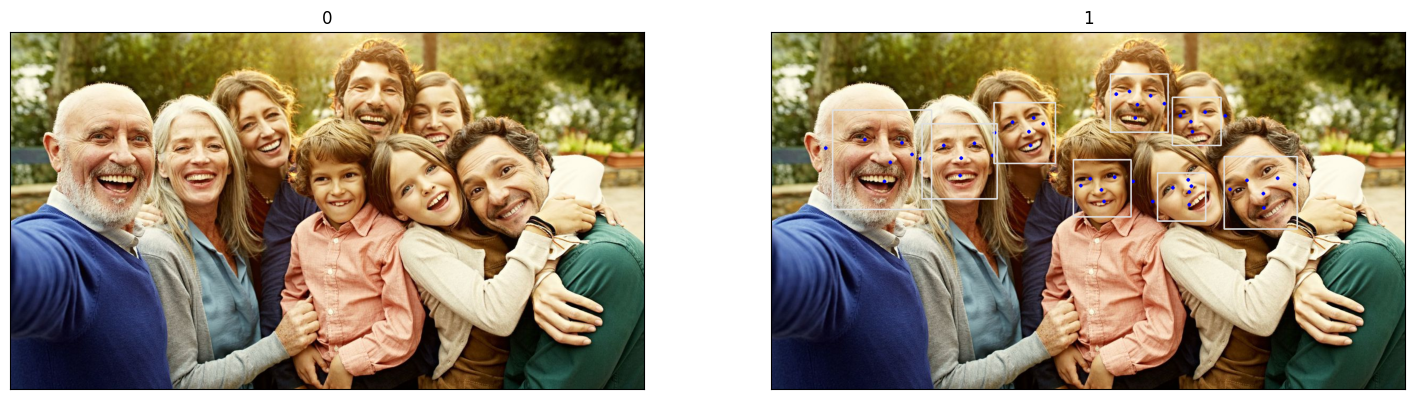

In [5]:
img = cv2.cvtColor(cv2.imread("img/familia.jpg"), cv2.COLOR_BGR2RGB)

with face_detector.FaceDetection(model_selection=1) as detector:
    results = detector.process(img)

    out = img.copy()
    for detection in results.detections:
        #print(detection)
        mp_drawing.draw_detection(out, detection)
    
display_color_row(img, out)

# Malla Facial (Face Mesh)

MediaPipe incluye un modelo de predicción de marcas faciales con 468 marcadores que permiten mapear una malla en 3D de un rostro. Con estos marcadores se pueden realizar diversas aplicaciones más específicas.

El detector Face Mesh está basado en dos redes neuronales en cascada, un detector de rostros que predice la ubicación del rostro y un modelo de predicción de marcas faciales que trabaja sobre los rostros detectados.

<class 'numpy.ndarray'> uint8 [189 162  75]
<class 'numpy.ndarray'> uint8 [189 162  75]
<class 'numpy.ndarray'> uint8 [189 162  75]
<class 'numpy.ndarray'> uint8 [189 162  75]


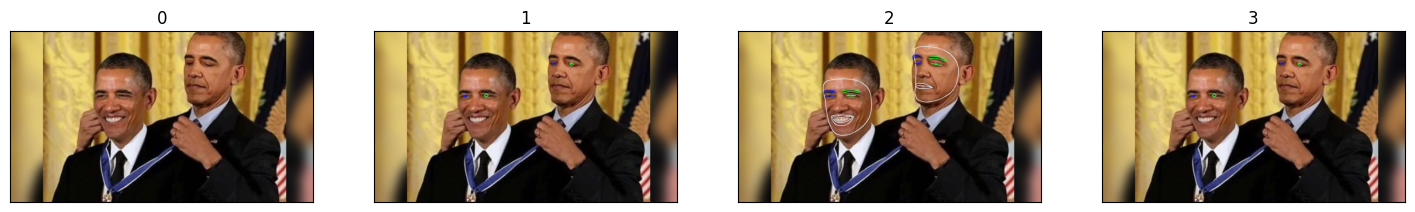

In [6]:
face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

img = cv2.cvtColor(cv2.imread("img/obama2.jpg"), cv2.COLOR_BGR2RGB)


with face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2, refine_landmarks=True) as mesh_detector:
    results = mesh_detector.process(img)
    out_mesh = img.copy()
    out_contours = img.copy()
    out_iris = img.copy()


    for face_landmarks in results.multi_face_landmarks:
        # print(face_landmarks)
        mp_drawing.draw_landmarks(
            image=out_mesh,
            landmark_list=face_landmarks,
            connections=face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
        )
        mp_drawing.draw_landmarks(
          image=out_contours,
          landmark_list=face_landmarks,
          connections=face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()
        )
        mp_drawing.draw_landmarks(
          image=out_iris,
          landmark_list=face_landmarks,
          connections=face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style()
        )

    
#display_color_row(img, out_iris, out_contours, out_iris)
display_color_row(img, out_contours)